In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#경로 설정
directory= 'C:\\Users\\USER\\PycharmProjects\\ERC\\'
os.chdir(directory)

In [24]:
def visual(data, data_n, method):
    for c in ['Emotion', 'Sex']:
        sns.scatterplot(x=data[0], y=data[1], hue=data[c])
        plt.xlabel('')
        plt.ylabel('')
        plt.savefig('img/{}_{}_{}.png'.format(data_n, method, c))
        plt.show()

Dimension Reduction
---

In [54]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE, LocallyLinearEmbedding
import umap

def dim_red(data_n, method):
    
    data = pd.read_csv('data/{}.csv'.format(data_n), encoding='cp949')
    data_f = data.drop(['id', 'Emotion', 'Sex', 'Arousal', 'Valence'], axis='columns')
    
    if method == 'pca':
        red = PCA(n_components=2)
    elif method == 'tsne':
        red = TSNE(n_components=2)
    elif method == 'lle':
        red = LocallyLinearEmbedding(n_components=2) 
    elif method == 'umap':
        red = umap.UMAP(n_components=2, n_neighbors=15, min_dist=0.25) 
    else:
        print('No Method')
    
    data_red = red.fit_transform(data_f)
    data_red = pd.DataFrame(data_red)
    data_all = pd.concat([data[['Emotion', 'Sex']], data_red], axis=1)
    data_all.to_csv('data/red/{}_{}.csv'.format(data_n, method), index=False)

    visual(data_all, data_n, method)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


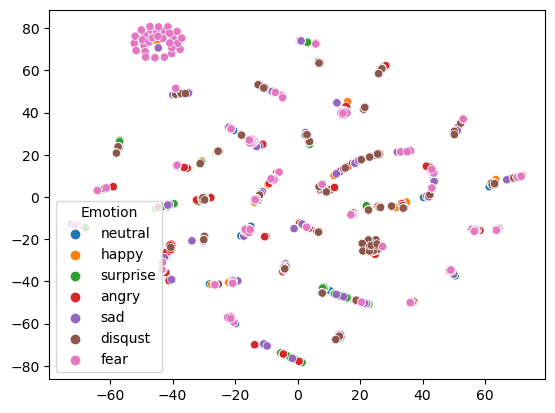

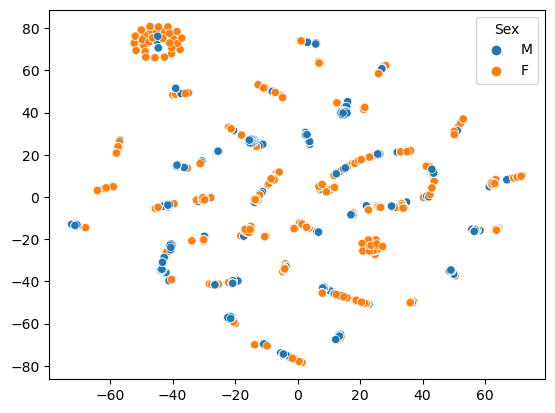

In [60]:
data_n = 'temp_ibi' #temp, ibi, eda
method = 'tsne' #pca, tsne, umap

dim_red(data_n, method)